In [1]:
# 2023-08
# Penrose tilings from de Bruijn indices
# WIP

In [1]:
import numpy as np
import xml.etree.ElementTree as ET
from IPython.display import SVG, display

In [2]:
bounds = [[0, 1], [0, 1]]
n = 5

In [3]:
def centerstep(k, offset):
    return offset * np.exp(2j*np.pi*k/n), np.exp(2j*np.pi*(k/n + 1/4))

def intersection(k1, offset1, k2, offset2):
    c1, s1 = centerstep(k1, offset1)
    c2, s2 = centerstep(k2, offset2)
    
    t1 = np.real(s2 * np.imag(c1 - c2) - np.imag(s2) * (c1 - c2)) / np.real(np.imag(s2) * s1 - s2 * np.imag(s1))
    t2 = np.real(s1 * np.imag(c2 - c1) - np.imag(s1) * (c2 - c1)) / np.real(np.imag(s1) * s2 - s1 * np.imag(s2))

    assert np.abs(c1 + t1*s1 - (c2 + t2*s2)) < 1e-3
    
    z = c1 + t1 * s1
    
    return k1, k2, t1, t2, z
    

def visible_lines(radius, phases, k):
    assert 0 <= k < n
    
    out = np.arange(np.ceil(-radius-phases[k]), (radius-phases[k]) + 1, 1)
    return out

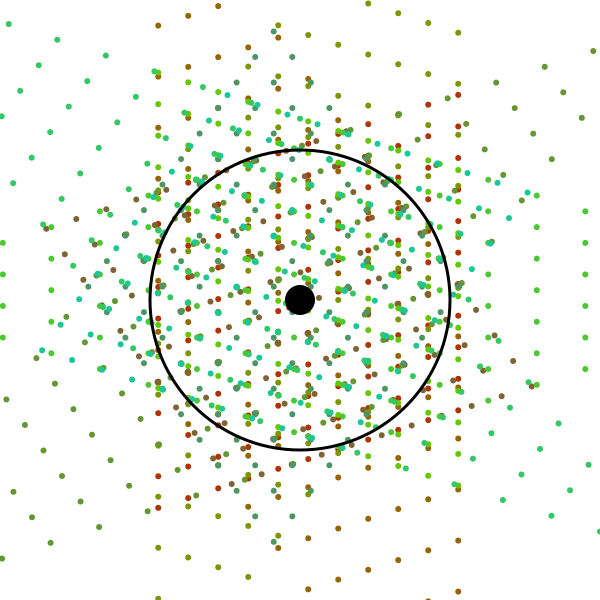

In [4]:
radius = 5
phases = np.random.random(n)

sects = set()

svg = ET.Element('svg', width='600', height='600', version='1.1', xmlns='http://www.w3.org/2000/svg', 
                 viewBox=f'{-2*radius} {-2*radius} {4*radius} {4*radius}')

for i in range(5):
    for j in range(i):
        for di in visible_lines(radius, phases, i):
            for dj in visible_lines(radius, phases, j):
                sect = intersection(i, di + phases[i], j, dj + phases[j])
                sects.add(sect)
                k1, k2, t1, t2, z = sect
                _ = ET.SubElement(svg, 'circle', cx=f'{np.real(z)}', cy=f'{np.imag(z)}', r='0.1', 
                                  fill=f'rgb({200 - i * 25 - j * 25}, {i * 50}, {j * 50})')

                
_ = ET.SubElement(svg, 'circle', cx=f'0', cy=f'0', r='0.5', fill='black')
_ = ET.SubElement(svg, 'circle', {'cx': f'0', 'cy': f'0', 'r': f'{radius}', 
                   'stroke': 'black', 'stroke-width': '0.1', 'fill': 'none'})
                
display(SVG(ET.tostring(svg, encoding='unicode')))

In [5]:
sects;

In [6]:
np.ceil(-radius - phases[3])

-5.0

<svg width="100" height="100" version="1.1" xmlns="http://www.w3.org/2000/svg"><rect x="10" y="10" width="80" height="80" fill="red" /></svg>


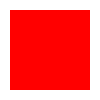

In [10]:

# Create the SVG element
svg = ET.Element('svg', width='100', height='100', version='1.1', xmlns='http://www.w3.org/2000/svg')

# Create a rectangle
rect = ET.SubElement(svg, 'rect', x='10', y='10', width='80', height='80', fill='red')

# Use ET.tostring to convert to string and decode from bytes
svg_string = ET.tostring(svg, encoding='unicode')

# Print the SVG
print(svg_string)


# Render the SVG
display(SVG(svg_string))
